# Anexo 1: Optimalidad y Métodos de Gradiente

Este material es un apoyo al equipo docente del curso **Modelado en Optimización** (Uniandes), y un punto de partida para estudiantes que busquen profundizar en el tema. Se revisan conceptos clave de las secciones 1.1 a 1.3 del libro *Nonlinear Programming* (Bertsekas, 1999), a partir de una síntesis generada por IA generativa revisada por el equipo del curso. 

## 1.1 Condiciones de optimalidad

### Idea central
- Optimizar = encontrar el valle más bajo de una montaña (mínimo).
- En un punto mínimo, la **pendiente debe ser cero** (no hay forma de bajar más).
- En varias dimensiones, la pendiente se mide con el **gradiente**.

### Definiciones clave
- **Gradiente**: $\nabla f(x) = (\tfrac{\partial f}{\partial x_1}, \dots, \tfrac{\partial f}{\partial x_n})$.
- **Condición de primer orden (necesaria)**: Si $x^*$ es mínimo local y $f$ es diferenciable, entonces $\nabla f(x^*)=0$.
- **Condición de segundo orden**: Si además $f$ es dos veces diferenciable, la matriz Hessiana $\nabla^2 f(x^*)$ debe ser **semidefinida positiva**.
- Si $\nabla^2 f(x^*)$ es **definida positiva**, entonces $x^*$ es un mínimo local estricto.
- **Convexidad**: Si $f$ es convexa, cualquier mínimo local es global.

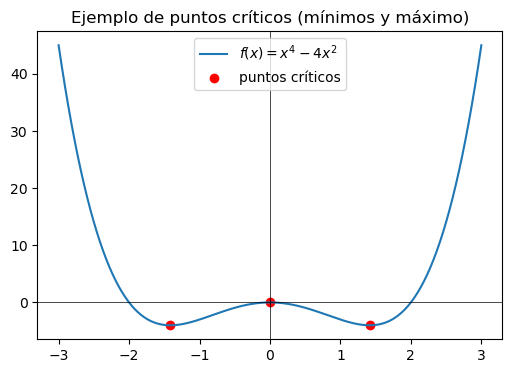

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3,3,400)
f = x**4 - 4*x**2

plt.figure(figsize=(6,4))
plt.plot(x, f, label='$f(x)=x^4-4x^2$')
plt.axhline(0,color='k',linewidth=0.5)
plt.axvline(0,color='k',linewidth=0.5)
plt.scatter([0, -np.sqrt(2), np.sqrt(2)], [0, f[(np.abs(x+np.sqrt(2))).argmin()], f[(np.abs(x-np.sqrt(2))).argmin()]],
            color='red', label='puntos críticos')
plt.title('Ejemplo de puntos críticos (mínimos y máximo)')
plt.legend()
plt.show()

## 1.2 Métodos de gradiente

### Idea central
- Para encontrar el mínimo, no basta con saber la condición ($\nabla f(x)=0$). Necesitamos un **algoritmo** para llegar ahí.
- El **método del gradiente** es como bajar una montaña paso a paso: miramos hacia dónde baja más rápido (gradiente negativo) y damos un paso.
- El tamaño del paso importa: demasiado grande = te pasas del valle, demasiado pequeño = caminas lento.

### Definiciones clave
- **Dirección de descenso**: Un vector $d$ tal que $\nabla f(x)^\top d < 0$.
- La dirección más común: $d = -\nabla f(x)$.
- **Actualización del método**: $x_{k+1} = x_k - \alpha \nabla f(x_k)$.
- $\alpha$ = tamaño de paso (también llamado *learning rate* en aprendizaje automático).

### Nota docente
Para este curso basta con entender la versión de $\alpha$ fijo. Las reglas avanzadas (Armijo, Wolfe, Lipschitz) se dejan para cursos de posgrado.

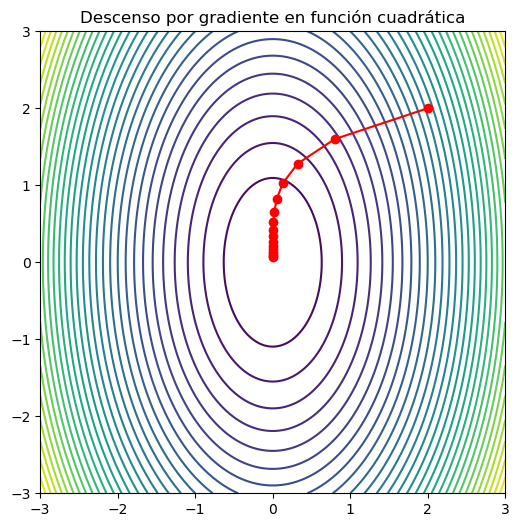

In [2]:
def f_quad(x):
    return 0.5*(3*x[0]**2 + x[1]**2)
def grad_quad(x):
    return np.array([3*x[0], x[1]])

x0 = np.array([2.0,2.0])
alpha = 0.2
xs = [x0]
for k in range(15):
    xs.append(xs[-1] - alpha*grad_quad(xs[-1]))
xs = np.array(xs)

X,Y = np.meshgrid(np.linspace(-3,3,200), np.linspace(-3,3,200))
Z = 0.5*(3*X**2 + Y**2)

plt.figure(figsize=(6,6))
plt.contour(X,Y,Z,levels=30)
plt.plot(xs[:,0], xs[:,1], 'o-',color='red')
plt.title('Descenso por gradiente en función cuadrática')
plt.show()

## 1.3 Tasa de convergencia

### Idea central
- No basta con saber que el método funciona, también queremos saber **qué tan rápido llega al mínimo**.
- Si el valle es simétrico (bien condicionado), bajamos rápido. Si es un valle alargado (mal condicionado), el algoritmo zigzaguea y avanza lento.

### Definiciones clave
- **Convergencia lineal**: cada paso reduce el error por un factor constante menor que 1.
- **Número de condición** ($\kappa$): mide qué tan alargado es el valle. Cuanto más grande $\kappa$, más lento converge el gradiente.

### Ejemplo intuitivo
- $f(x,y) = 5x^2 + y^2$ → valle alargado, zig-zag.
- $f(x,y) = x^2 + y^2$ → valle redondo, converge rápido.

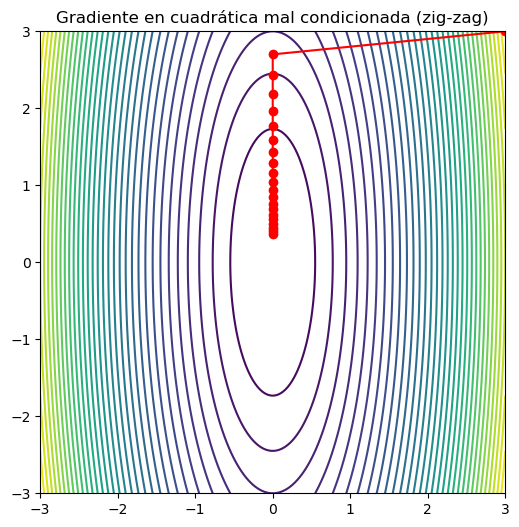

In [3]:
Q = np.array([[10,0],[0,1]])
def gradQ(x):
    return Q@x

x0 = np.array([3.0,3.0])
alpha = 0.1
xs = [x0]
for k in range(20):
    xs.append(xs[-1] - alpha*gradQ(xs[-1]))
xs = np.array(xs)

X,Y = np.meshgrid(np.linspace(-3,3,200), np.linspace(-3,3,200))
Z = 0.5*(10*X**2 + Y**2)

plt.figure(figsize=(6,6))
plt.contour(X,Y,Z,levels=40)
plt.plot(xs[:,0], xs[:,1], 'o-',color='red')
plt.title('Gradiente en cuadrática mal condicionada (zig-zag)')
plt.show()

## Cierre

- **Gradiente cero = condición para un mínimo local.**
- **Método del gradiente = bajar paso a paso siguiendo la pendiente.**
- **Forma del valle (condicionamiento) determina la velocidad.**

👉 Estos conceptos son la base de todo lo que viene: métodos avanzados, problemas con restricciones, y aplicaciones en optimización moderna y aprendizaje automático.